## Boosting Models

1. AdaBoost
2. Gradient Boosting
3. Extreme Gradient Boosting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('credit_card_clean.csv')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Exploring the variables:
ID : ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)


###### Note: NT is Taiwain Dollars

In [ ]:
df.isnull().sum()/len(df)

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
DEFAULT      0.0
dtype: float64

In [ ]:
sum(df.duplicated())

0

In [ ]:
# dropping the duplicates:
df.drop_duplicates(inplace=True)

In [ ]:
df.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        4
MARRIAGE         3
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

### Encode ordinal categorical features as an integer array.
For boosting models in general we don't need to transfer the categorical variables into dummy variables (using one-hot-encoding). However, the algorithm is not able to handle string data. We should transform string categorical variables into quantitative variables.

It seems that SEX, EDUCATION, MARRIAGE are string categotical variables and should be transformed into numerics.

In [ ]:
ordinal_categoricals = ['SEX', 'EDUCATION', 'MARRIAGE']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()

In [ ]:
df[ordinal_categoricals]= enc.fit_transform(df[ordinal_categoricals])

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,0.0,3.0,0.0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0.0,3.0,2.0,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0.0,3.0,2.0,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0.0,3.0,0.0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1.0,3.0,0.0,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['grad', 'highschool', 'other', 'university'], dtype=object),
 array(['married', 'other', 'single'], dtype=object)]

Remember, with other machine learning models, we ended up with *78 features* using the same data set because we had to transform categorical variables into dummies. But with RF, there is only *23 features* to work with.

### Scaling features
In boosting models, we don't need to scale the features!! However, you can scale the features to speed up the process a little bit and be better protected against outliers. In this example we don't scale the features for a fair comparison to our previous models applied to the same data set.

In [ ]:

# first we look at target variable proportions:
pd.crosstab(df['DEFAULT'],df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


#### Defining the variables and splitting the data

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [ ]:
y = df['DEFAULT']
X = df.drop(['DEFAULT','ID'], axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

## Boosting classification with Sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier # we will be using RF as our benchmark.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
from xgboost import XGBClassifier

### Training the models

In [ ]:
%%time 
# Fitting RF classifier to the Training set
RF_classifier = RandomForestClassifier(random_state=1000)
RF_classifier.fit(X_train, y_train)

Wall time: 6.01 s


RandomForestClassifier(random_state=1000)

In [ ]:
%%time
# Fitting AdaBoost classifier to the Training set
AdB_classifier = AdaBoostClassifier(random_state=1000)
AdB_classifier.fit(X_train, y_train)

Wall time: 2.04 s


AdaBoostClassifier(random_state=1000)

In [ ]:
%%time
# Fitting Gradient Boosting classifier to the Training set
GBM_classifier = GradientBoostingClassifier(random_state=1000, learning_rate=0.1, max_depth=6)
GBM_classifier.fit(X_train, y_train)

Wall time: 16.4 s


GradientBoostingClassifier(max_depth=6, random_state=1000)

In [ ]:
%%time
# Fitting XGBoost classifier to the Training set
XGB_classifier = XGBClassifier(random_state=1000, eta=0.1, max_depth=6)
XGB_classifier.fit(X_train, y_train)

[13:29:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 3.79 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              random_state=1000, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
# Predicting the Test set probabilities and classes
y_hat_RF       = RF_classifier.predict(X_test)
y_hat_AdB      = AdB_classifier.predict(X_test)
y_hat_GBM      = GBM_classifier.predict(X_test)
y_hat_XGB      = XGB_classifier.predict(X_test)

## Evaluating the model performance on test data

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

### Comparing accuracy and f1scores among the boosters and RF

In [ ]:
print('RF  Accuracy = {}'.format(accuracy_score(y_test, y_hat_RF)))
print('AdB Accuracy = {}'.format(accuracy_score(y_test, y_hat_AdB)))
print('GBM Accuracy = {}'.format(accuracy_score(y_test, y_hat_GBM)))
print('XGB Accuracy = {}'.format(accuracy_score(y_test, y_hat_XGB)))

RF  Accuracy = 0.8203333333333334
AdB Accuracy = 0.8193333333333334
GBM Accuracy = 0.821
XGB Accuracy = 0.8222222222222222


In [ ]:
print('RF  f1 = {}'.format(f1_score(y_test, y_hat_RF)))
print('AdB f1 = {}'.format(f1_score(y_test, y_hat_AdB)))
print('GBM f1 = {}'.format(f1_score(y_test, y_hat_GBM)))
print('XGB f1 = {}'.format(f1_score(y_test, y_hat_XGB)))

RF  f1 = 0.4795622787254586
AdB f1 = 0.4458077709611452
GBM f1 = 0.48480972177806203
XGB f1 = 0.48553054662379425


### Feature Importance

In [ ]:
features = list(X_train.columns)

In [ ]:
RF_importance  = RF_classifier.feature_importances_
AdB_importance = AdB_classifier.feature_importances_
GBM_importance = GBM_classifier.feature_importances_
XGB_importance = XGB_classifier.feature_importances_

In [ ]:

FIM = pd.DataFrame({'Features': X_train.columns 
                   , 'RF_Feature_importance':RF_importance
                   , 'AdB_Feature_importance':AdB_importance
                   , 'GBM_Feature_importance':GBM_importance
                   , 'XGB_Feature_importance':XGB_importance})
FIM = FIM.sort_values(by=['RF_Feature_importance'])
FIM

,Features,RF_Feature_importance,AdB_Feature_importance,GBM_Feature_importance,XGB_Feature_importance
3,MARRIAGE,0.012858,0.02,0.003870,0.015875
1,SEX,0.012911,0.02,0.005168,0.014272
2,EDUCATION,0.018517,0.02,0.008704,0.014046
9,PAY_5,0.019182,0.04,0.014359,0.035452
10,PAY_6,0.019509,0.02,0.017436,0.029410
8,PAY_4,0.021780,0.00,0.014560,0.044612
7,PAY_3,0.028568,0.04,0.016059,0.031272
6,PAY_2,0.043888,0.04,0.073678,0.147807
20,PAY_AMT4,0.044251,0.08,0.027604,0.016010
21,PAY_AMT5,0.044532,0.04,0.024445,0.014610


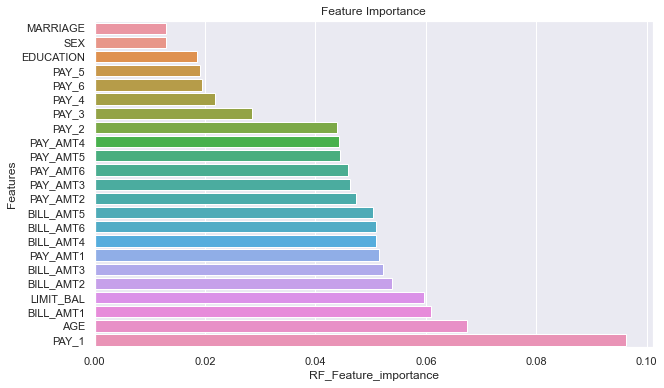

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='RF_Feature_importance', data=FIM)
plt.show()


Recall:

PAY_1: repayment status in the past 1 month (paid in full, paid minimum due, delay for # months)
PAY_2: repayment status in the past 2 months
....
BILL_AMT: amount of bill statement
